<a href="https://colab.research.google.com/github/PhanTheMinhChau/baitap/blob/main/dulieuanova/du-lieu-anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DỮ LIỆU DÙNG CHO KIỂM ĐỊNH ANOVA MỘT CHIỀU

ANOVA là viết tắt của Analysis of Variance. Đây là một kiểm định thống kê dùng để phân tích sự khác biệt về đại lượng trung bình của 3 nhóm phan biệt trở lên.

1. Trường hợp sử dụng ANOVA một chiều

ANOVA một chiều được sử dụng khi bạn thu thập dữ liệu về một biến độc lập (định tính) kiểu phân loại (categorical data) và một biến phụ thuộc kiểu định lượng. Biến độc lập phải phải có tối thiểu 3 mức (hay tối thiểu 3 nhóm hay ba phân loại tùy theo cách gọi trong từng trường hợp).

ANOVA cho biết xem thử biến phụ thuộc thay đổi theo các mức độ của biến độc lập như thế nào. Ví dụ:

- Biến độc lập là việc sử dụng công cụ truyền thông, và bạn gán các nhóm là thấp, trung bình và cao để tìm ra xem thử ở đây có sự khác biệt nào (tính theo giờ sử dụng) hàng đêm hay không.
- Biến độc lập là nhãn hàng các đồ uống gồm Coke, Pepsi, Sprite, và Fanta và cố tìm xem thử có sự khác biệt nào về giá cả các đồ uống này xét theo đơn vị lon 100ml hay không.
- Biến độc lập là các loại phân bón và bạn bón từng loại phân cho từng cánh đồng và xem xét sự khác biệt.


In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(1234)
#Xây dựng dữ liệu mô phỏng
social_levels = ['low', 'medium', 'high']
social_use = np.random.choice(social_levels, 100, p = [0.2, 0.5, 0.3])
hours = np.random.choice(8, 100)

In [3]:
df = pd.DataFrame({'Social Use': social_use, 'Hour Use': hours})
df

Social Use  Hour Use
0         low         4
1      medium         5
2      medium         5
3        high         1
4        high         0
..        ...       ...
95     medium         1
96     medium         7
97       high         5
98        low         7
99     medium         0

[100 rows x 2 columns]

Bạn thấy dữ liệu mô phỏng ở trên bất hợp lý ở điểm nào? Nếu có thì bạn hãy chỉnh sửa lại

*kích thước mỗi nhóm không đồng nhất*

In [4]:
social_levels = ['low', 'medium', 'high']
social_use = np.random.choice(social_levels, 120)
while list(social_use).count("low") != list(social_use).count("medium") or list(social_use).count("medium") != list(social_use).count("high"):
  social_use = np.random.choice(social_levels, 120)
print(list(social_use).count("low")) #kích thước nhóm low
print(list(social_use).count("medium")) #kích thức nhóm medium
print(list(social_use).count("high")) #kích thước nhóm high
hours = np.random.choice(8, 120)
df = pd.DataFrame({'Social Use': social_use, 'Hour Use': hours})
df

40
40
40


Social Use  Hour Use
0       medium         0
1         high         7
2         high         4
3         high         6
4          low         7
..         ...       ...
115        low         5
116       high         5
117        low         7
118       high         7
119     medium         6

[120 rows x 2 columns]

Xây dựng giả thuyết
$$H_{0}: \mu_{1} = \mu_{2} = ... = \mu_{n}$$
$$H_{a}: \text{Tồn tại ít nhất một cặp } (\mu_{i}, \mu_{j}) \text{ có giá trị khác nhau}$$

Hãy xây dựng dữ liệu mô phỏng cho ví dụ sau:

Xét điểm trung bình (GPA) của sinh viên đại học năm 1 - 2 - 3 - 4. Hay nói cách khác là chúng ta nghiên cứu về mối quan hệ giữa năm học và điểm trung bình. Như vậy chúng ta có 4 nhóm sinh viên: năm 1, năm 2, năm 3 và năm 4.

* $\mu_{1}$ : điểm trung bình của sinh viên năm 1
* $\mu_{2}$ : điểm trung bình của sinh viên năm 2
* $\mu_{3}$ : điểm trung bình của sinh viên năm 3
* $\mu_{4}$ : điểm trung bình của sinh viên năm 4

Lưu ý: các nhóm này phải có kích thước bằng nhau; và điểm trung bình nằm trong đoạn $[0, 5]$

In [5]:

# năm 1
point_1 = np.random.normal(loc = np.random.uniform(5) , size = 50)
df_1 = pd.DataFrame({'group': "năm 1", 'point': point_1})
# năm 2
point_2 = np.random.normal(loc = np.random.uniform(5) , size = 50)
df_2 = pd.DataFrame({'group': "năm 2", 'point': point_2})
# năm 3
point_3 = np.random.normal(loc = np.random.uniform(5) , size = 50)
df_3 = pd.DataFrame({'group': "năm 3", 'point': point_3})
# năm 4
point_4 = np.random.normal(loc = np.random.uniform(5) , size = 50)
df_4 = pd.DataFrame({'group': "năm 4", 'point': point_4})

df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
df

group     point
0    năm 1  1.997944
1    năm 1  2.392643
2    năm 1  3.291898
3    năm 1  1.577175
4    năm 1  2.545203
..     ...       ...
195  năm 4  2.456547
196  năm 4  1.682980
197  năm 4  1.714243
198  năm 4  0.788087
199  năm 4 -0.224744

[200 rows x 2 columns]

Hãy phát biểu giả thuyết nghiên cứu cho ví dụ này

Phát biểu của bạn ở đây: ...

$$H_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$$ 

$$H_{a}: \text{Tồn tại ít nhất một cặp } (\mu_{i}, \mu_{j}) \text{ có giá trị khác nhau}$$

Bài tập 2: Dựa vào hình vẽ dưới đây, hãy phát biểu về tập dữ liệu và xây dựng dữ liệu mô phỏng cho tập dữ liệu đó

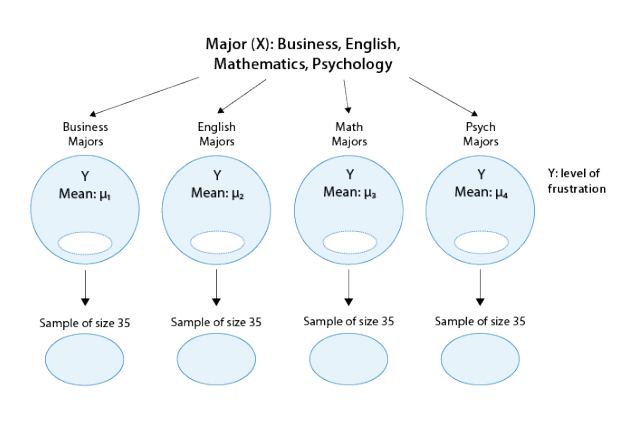

In [6]:
from IPython.display import Image
Image("https://adata.site.wesleyan.edu/files/2017/10/Pic3.png")

$$H_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}$$ 

$$H_{a}: \text{Tồn tại ít nhất một cặp } (\mu_{i}, \mu_{j}) \text{ có giá trị khác nhau}$$

In [7]:
# năm 1
point_1 = np.random.choice(10, 35)
df_1 = pd.DataFrame({'group': "bussiness", 'point': point_1})
# năm 2
point_2 = np.random.choice(10, 35)
df_2 = pd.DataFrame({'group': "english", 'point': point_2})
# năm 3
point_3 = np.random.choice(10, 35)
df_3 = pd.DataFrame({'group': "math", 'point': point_3})
# năm 4
point_4 = np.random.choice(10, 35)
df_4 = pd.DataFrame({'group': "psych", 'point': point_4})

df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
df

group  point
0    bussiness      7
1    bussiness      3
2    bussiness      6
3    bussiness      4
4    bussiness      0
..         ...    ...
135      psych      9
136      psych      0
137      psych      0
138      psych      9
139      psych      2

[140 rows x 2 columns]